In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten 

tf.random.set_seed(100)
 
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x[:10000]
test_x = test_x[:10000]
train_y = train_y[:10000]
test_y = test_y[:10000]

train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

train_norm = train_x / 255.0
test_norm = test_x / 255.0

model1 = Sequential()
model1.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='glorot_normal', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(15, activation='relu', kernel_initializer='glorot_normal'))
model1.add(Dense(10, activation='softmax'))
model1.summary() 

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 15)                40575     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 40,895
Trainable params: 40,895
Non-trainable params: 0
_________________________________________________________________


In [8]:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1.fit(train_norm, train_y, epochs=5, batch_size=32, verbose=1)
print('\n=== Result for the test dataset is as follows ===')
model1.evaluate(test_norm, test_y, verbose=1)

Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 2.3011 - accuracy: 0.1127
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 2.3000 - accuracy: 0.1182
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 2.3004 - accuracy: 0.1123
Epoch 4/5
313/313 [==============================] - 1s 2ms/step - loss: 2.3018 - accuracy: 0.1086
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1102

=== Result for the test dataset is as follows ===
313/313 [==============================] - 1s 2ms/step - loss: 2.3017 - accuracy: 0.1135


[2.301682233810425, 0.11349999904632568]

In [3]:
def scheduler(epoch, lr):
  if epoch < 10:
    return round(lr, 5)
  else:
    return round(lr, 5) * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

In [4]:
callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

In [6]:
model1.fit(train_norm, train_y, validation_split=0.2, epochs=20, batch_size=32, verbose=1, callbacks=[callback])

Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 0.1.
250/250 [==============================] - 1s 3ms/step - loss: 2.3144 - accuracy: 0.1041 - val_loss: 2.3118 - val_accuracy: 0.1080
Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 0.1.
250/250 [==============================] - 1s 3ms/step - loss: 2.3127 - accuracy: 0.1021 - val_loss: 2.3162 - val_accuracy: 0.0905
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 0.1.
250/250 [==============================] - 1s 3ms/step - loss: 2.3115 - accuracy: 0.1014 - val_loss: 2.3192 - val_accuracy: 0.1085
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.1.
250/250 [==============================] - 1s 3ms/step - loss: 2.3169 - accuracy: 0.0979 - val_loss: 2.3100 - val_accuracy: 0.0955
Epoch 5/20

Epoch 00005: LearningRateScheduler reducing learning rate to 0.1.
250/250 [==============================] - 1s 3ms/step - loss: 2.3151 - accuracy: 0.10

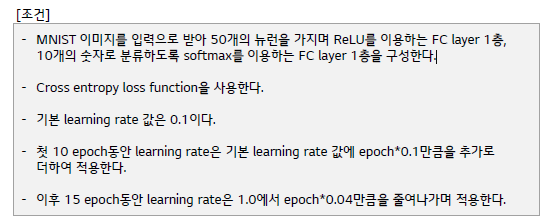

In [14]:
import tensorflow as tf

''' MNIST data setting'''
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10) 

''' Feedforward Model setting'''
model3 = tf.keras.models.Sequential([
###### 여기에 코드를 작성하시오 ######
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
######################################
])

''' Model build '''

###### 여기에 코드를 작성하시오 ######
def scheduler(epoch, lr):
  if epoch < 10:
    return 0.1 + epoch*0.1
  else:
    return 1.0 - epoch*0.004
callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])  
######################################
history = model3.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), callbacks=[callback], verbose=1)

Epoch 1/25

Epoch 00001: LearningRateScheduler reducing learning rate to 0.1.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4971 - accuracy: 0.8560 - val_loss: 0.1848 - val_accuracy: 0.9448
Epoch 2/25

Epoch 00002: LearningRateScheduler reducing learning rate to 0.2.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1920 - accuracy: 0.9436 - val_loss: 0.1357 - val_accuracy: 0.9565
Epoch 3/25

Epoch 00003: LearningRateScheduler reducing learning rate to 0.30000000000000004.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1388 - accuracy: 0.9582 - val_loss: 0.1108 - val_accuracy: 0.9676
Epoch 4/25

Epoch 00004: LearningRateScheduler reducing learning rate to 0.4.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1288 - accuracy: 0.9600 - val_loss: 0.1121 - val_accuracy: 0.9663
Epoch 5/25

Epoch 00005: LearningRateScheduler reducing learning rate to 0.5.
1875/1875 [==============================] - 4s 2ms/step - los

KeyboardInterrupt: ignored

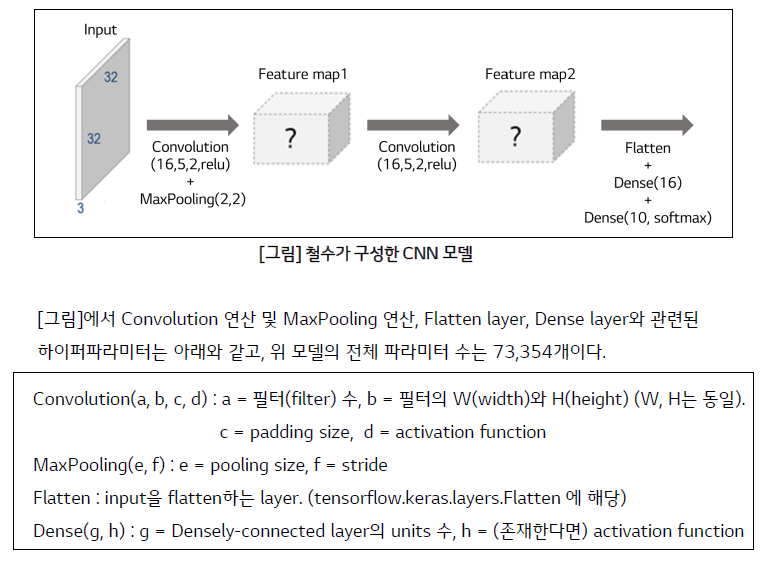

In [15]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

tf.random.set_seed(2020)

# def unpickle(file):
#     import pickle
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding = 'bytes')
#         return dict

# train1 = unpickle('./data_batch_1')
# x_train = train1[b'data'].reshape(10000,32,32,3)
# y_train = train1[b'labels']
# y_train = np.array(y_train, dtype = 'uint8')
# y_train = np.expand_dims(y_train, axis=1)
# x_train = x_train / 255.0
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x[:10000]
test_x = test_x[:10000]
train_y = train_y[:10000]
test_y = test_y[:10000]

train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

train_norm = train_x / 255.0
test_norm = test_x / 255.0

inputs = tf.keras.Input(shape=(28, 28, 1))
x = inputs
##### 여기에 코드를 작성하세요 #####

x = layers.Conv2D(16, 5, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Conv2D(16, 5, activation='relu', padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(16)(x)
x = layers.Dense(10, activation='softmax')(x)

#####################################
outputs = x
model4_1 = tf.keras.Model(inputs, outputs)
model4_1.summary()  

model4_1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model4_1.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=5)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        6416      
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                50192     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170   

#### 모델 전체 파라미터 수 <= 35,000 개
#### 5 epochs 학습 후 검증 데이터에 대한 accuracy >= 0.95
#### Convolution, Dense layer의 하이퍼 파라미터는 변경할 수 있음

In [20]:
inputs = tf.keras.Input(shape=(28, 28, 1))
x = inputs
##### 여기에 코드를 작성하세요 #####

x = layers.Conv2D(16, 3, activation='relu', padding='valid')(x)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Conv2D(16, 3, activation='relu', padding='valid')(x)
x = layers.Flatten()(x)
x = layers.Dense(10)(x)
x = layers.Dense(10, activation='softmax')(x)

#####################################
outputs = x
model4_2 = tf.keras.Model(inputs, outputs)
model4_2.summary()  

model4_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4_2.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=5)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
flatten_9 (Flatten)          (None, 1936)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                19370     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110 

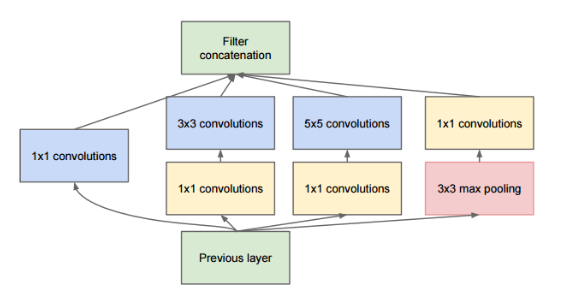

In [21]:
def inception_module(x) :
  branch1x1 = layers.Conv2D(filters = 64, kernel_size = 1, padding='same', activation='relu')(x)
  
  branch3x3dbl = layers.Conv2D(filters = 32, kernel_size = 1, padding='same', activation='relu')(x)
  branch3x3dbl = layers.Conv2D(filters = 64, kernel_size = 3, padding='same', activation='relu')(branch3x3dbl)

  branch5x5 = layers.Conv2D(filters = 32, kernel_size = 1, padding='same', activation='relu')(x)
  branch5x5 = layers.Conv2D(filters = 64, kernel_size = 5, padding='same', activation='relu')(branch5x5)

  branch_pool = layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
  branch_pool = layers.Conv2D(filters = 64, kernel_size = 1, padding='same', activation='relu')(branch_pool)
  x = layers.concatenate([branch1x1, branch3x3dbl, branch5x5, branch_pool], axis=3)
  return x

In [22]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = inputs
outputs = inception_module(x)
custom_model = tf.keras.Model(inputs, outputs)
custom_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 224, 224, 32) 128         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 224, 224, 32) 128         input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 224, 224, 3)  0           input_7[0][0]                    
____________________________________________________________________________________________

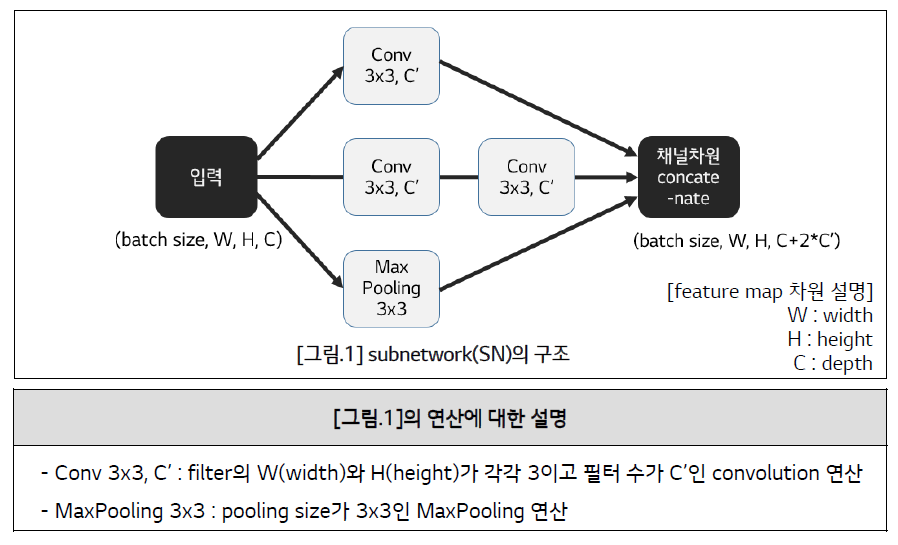

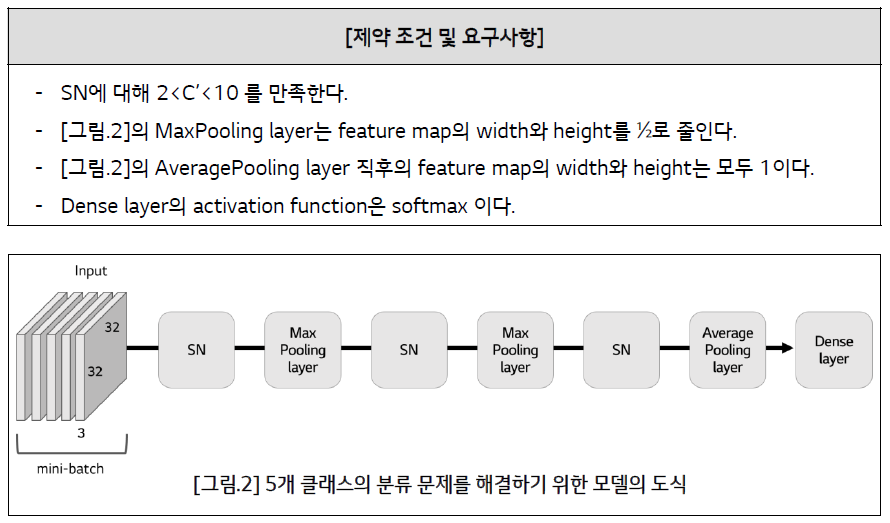

In [1]:
import tensorflow as tf
from tensorflow.keras import layers 

def subnetwork(x):
####### 여기에 코드를 작성하세요 (4점) #######
    x_1 = layers.Conv2D(filters = 5, kernel_size = 3, padding='same')(x)
    
    x_2 = layers.Conv2D(filters = 5, kernel_size = 3, padding='same')(x)
    x_2 = layers.Conv2D(filters = 5, kernel_size = 3, padding='same')(x_2)
    
    x_3 = layers.MaxPooling2D(pool_size=(3, 3), strides=1, padding='same')(x)

    return layers.concatenate([x_1, x_2, x_3], axis=3)
##############################################

inputs = tf.keras.Input(shape=(32, 32, 3))
x = inputs

####### 여기에 코드를 작성하세요 (3점) #######
x = subnetwork(x)
x = layers.MaxPooling2D(pool_size=(2,2), strides=2)(x)
x = subnetwork(x)
x = layers.MaxPooling2D(pool_size=(2,2), strides=2)(x)
x = subnetwork(x)
x = layers.AveragePooling2D(pool_size=(8,8), strides=1)(x)
x = layers.Dense(5, activation='softmax')(x)
##############################################
outputs = x
model5 = tf.keras.Model(inputs, outputs)
model5.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 5)    140         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 5)    140         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 5)    230         conv2d_1[0][0]                   
______________________________________________________________________________________________